In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [351]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [352]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [353]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [354]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [355]:
df.drop('CarName', axis = 1, inplace=True)

In [356]:
car_sales = pd.get_dummies(df,columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'])

In [357]:
car_sales.dtypes

car_ID                     int64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight                 int64
enginesize                 int64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower                 int64
peakrpm                    int64
citympg                    int64
highwaympg                 int64
price                    float64
symboling_-2               uint8
symboling_-1               uint8
symboling_0                uint8
symboling_1                uint8
symboling_2                uint8
symboling_3                uint8
fueltype_diesel            uint8
fueltype_gas               uint8
aspiration_std             uint8
aspiration_turbo           uint8
doornumber_four            uint8
doornumber_two             uint8
carbody_convertible        uint8
carbody_hardtop            uint8
carbody_hatchback          uint8
carbody_se

In [358]:
car_sales.isna().sum()

car_ID                   0
wheelbase                0
carlength                0
carwidth                 0
carheight                0
curbweight               0
enginesize               0
boreratio                0
stroke                   0
compressionratio         0
horsepower               0
peakrpm                  0
citympg                  0
highwaympg               0
price                    0
symboling_-2             0
symboling_-1             0
symboling_0              0
symboling_1              0
symboling_2              0
symboling_3              0
fueltype_diesel          0
fueltype_gas             0
aspiration_std           0
aspiration_turbo         0
doornumber_four          0
doornumber_two           0
carbody_convertible      0
carbody_hardtop          0
carbody_hatchback        0
carbody_sedan            0
carbody_wagon            0
drivewheel_4wd           0
drivewheel_fwd           0
drivewheel_rwd           0
enginelocation_front     0
enginelocation_rear      0
e

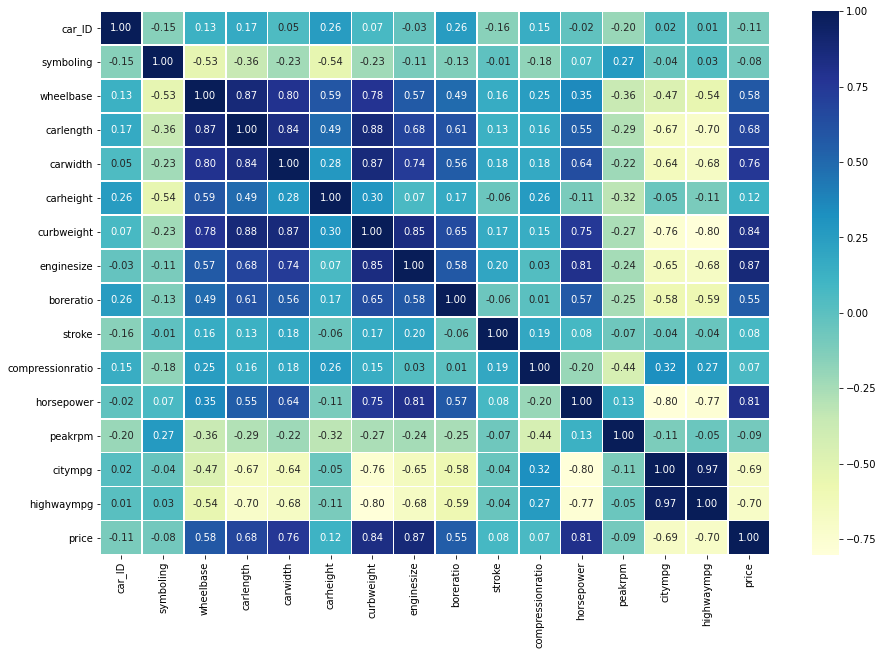

In [359]:
# Let's make it look a little prettier
import seaborn as sns
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [360]:
X = car_sales.drop('price', axis = 1)
y = car_sales['price']

In [361]:
# Split the data into train, validation & test sets
train_split = round(0.5 * len(car_sales)) # 50% of data
valid_split = round(train_split + 0.2 * len(car_sales)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

In [362]:
# normalization
mean = X_train.mean(axis=0)
X_train -= mean

std = X_train.std(axis=0)

X_train /= std
X_test -= mean
X_test /= std
X_valid -= mean
X_valid /= std

In [363]:
# normalization
mean = y_train.mean(axis=0)
y_train -= mean

std = y_train.std(axis=0)

y_train /= std
y_test -= mean
y_test /= std
y_valid -= mean
y_valid /= std

In [364]:
X_train.dropna(inplace=True,axis = 1)
X_valid.dropna(inplace=True, axis = 1)
X_test.dropna(inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [365]:
X_train

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.706724,-1.499169,-0.222866,-0.666141,-1.848528,0.099290,0.047843,0.883804,-2.666879,-0.200614,0.224443,-0.464412,-0.611102,-0.520613,-0.248771,-0.657525,-0.799272,-0.363354,2.603658,-0.270114,0.270114,0.429212,-0.429212,-0.938176,0.938176,5.716334,-0.173222,-0.782929,-0.995086,-0.248771,-0.140726,-1.438892,1.505944,4.925424,-0.099015,-2.307012,-0.270114,-0.201038,-0.201038,-0.328070,0.642325,-0.328070,-0.099015,-0.099015,-0.201038,-0.345968,-0.799272,-0.173222,-0.270114,-0.099015,1.471752,-0.270114,-0.099015
1,-1.672928,-1.499169,-0.222866,-0.666141,-1.848528,0.099290,0.047843,0.883804,-2.666879,-0.200614,0.224443,-0.464412,-0.611102,-0.520613,-0.248771,-0.657525,-0.799272,-0.363354,2.603658,-0.270114,0.270114,0.429212,-0.429212,-0.938176,0.938176,5.716334,-0.173222,-0.782929,-0.995086,-0.248771,-0.140726,-1.438892,1.505944,4.925424,-0.099015,-2.307012,-0.270114,-0.201038,-0.201038,-0.328070,0.642325,-0.328070,-0.099015,-0.099015,-0.201038,-0.345968,-0.799272,-0.173222,-0.270114,-0.099015,1.471752,-0.270114,-0.099015
2,-1.639131,-0.560551,-0.048002,-0.103272,-0.306548,0.555863,0.473876,-2.315518,0.486880,-0.200614,1.338023,-0.464412,-0.878623,-0.647957,-0.248771,-0.657525,1.238872,-0.363354,-0.380310,-0.270114,0.270114,0.429212,-0.429212,-0.938176,0.938176,-0.173222,-0.173222,1.264732,-0.995086,-0.248771,-0.140726,-1.438892,1.505944,-0.201038,-0.099015,-2.307012,3.665839,-0.201038,-0.201038,-0.328070,-1.541581,3.018245,-0.099015,-0.099015,-0.201038,-0.345968,-0.799272,-0.173222,-0.270114,-0.099015,1.471752,-0.270114,-0.099015
3,-1.605334,0.282615,0.345442,0.178163,0.507274,-0.251025,-0.358824,-0.250133,0.207433,0.094194,-0.008632,0.622057,-0.209820,-0.138580,-0.248771,-0.657525,-0.799272,2.725155,-0.380310,-0.270114,0.270114,0.429212,-0.429212,1.055448,-1.055448,-0.173222,-0.173222,-0.782929,0.995086,-0.248771,-0.140726,0.688166,-0.657525,-0.201038,-0.099015,0.429212,-0.270114,-0.201038,-0.201038,-0.328070,0.642325,-0.328070,-0.099015,-0.099015,-0.201038,-0.345968,-0.799272,-0.173222,-0.270114,-0.099015,1.471752,-0.270114,-0.099015
4,-1.571538,0.218980,0.345442,0.258573,0.507274,0.557523,0.164034,-0.250133,0.207433,-0.495423,0.328031,0.622057,-1.012384,-1.157334,-0.248771,-0.657525,-0.799272,2.725155,-0.380310,-0.270114,0.270114,0.429212,-0.429212,1.055448,-1.055448,-0.173222,-0.173222,-0.782929,0.995086,-0.248771,7.036320,-1.438892,-0.657525,-0.201038,-0.099015,0.429212,-0.270114,-0.201038,-0.201038,3.018245,-1.541581,-0.328070,-0.099015,-0.099015,-0.201038,-0.345968,-0.799272,-0.173222,-0.270114,-0.099015,1.471752,-0.270114,-0.099015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.571538,-0.560551,-0.120862,-0.786756,0.164612,-0.749105,-0.591206,-0.412124,-0.231698,-0.082691,-0.863240,-0.029825,0.726503,0.752829,-0.248771,-0.657525,1.238872,-0.363354,-0.380310,-0.270114,0.270114,0.429212,-0.429212,1.055448,-1.055448,-0.173222,-0.173222,-0.782929,-0.995086,3.980344,-0.140726,0.688166,-0.657525,-0.201038,-0.099015,0.429212,-0.270114,-0.201038,-0.201038,-0.328070,0.642325,-0.328070,-0.099015,-0.099015,

In [366]:
from keras import models
from keras import layers
model = models.Sequential()
def build_model(fun):
    model.add(layers.Dense(10, activation=fun, input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation=fun))
    model.add(layers.Dense(6, activation=fun))

    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [367]:
build_model('relu').summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_132 (Dense)            (None, 10)                540       
_________________________________________________________________
dense_133 (Dense)            (None, 8)                 88        
_________________________________________________________________
dense_134 (Dense)            (None, 6)                 54        
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 7         
Total params: 689
Trainable params: 689
Non-trainable params: 0
_________________________________________________________________


In [368]:
X_valid.dtypes

car_ID                   float64
wheelbase                float64
carlength                float64
carwidth                 float64
carheight                float64
curbweight               float64
enginesize               float64
boreratio                float64
stroke                   float64
compressionratio         float64
horsepower               float64
peakrpm                  float64
citympg                  float64
highwaympg               float64
symboling_-1             float64
symboling_0              float64
symboling_1              float64
symboling_2              float64
symboling_3              float64
fueltype_diesel          float64
fueltype_gas             float64
aspiration_std           float64
aspiration_turbo         float64
doornumber_four          float64
doornumber_two           float64
carbody_convertible      float64
carbody_hardtop          float64
carbody_hatchback        float64
carbody_sedan            float64
carbody_wagon            float64
drivewheel

In [369]:
import tensorflow as tf
partial_x_train = tf.constant(X_train)
partial_y_train = tf.constant(y_train)
partial_x_valid = tf.constant(X_valid)
partial_y_valid = tf.constant(y_valid)

In [370]:
model = build_model('relu')
history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(partial_x_valid, partial_y_valid),
                    epochs=100, batch_size=1, verbose=0)
mae_history = history.history['val_mae']


In [371]:
mae_history

[0.5843981504440308,
 0.5434375405311584,
 0.4335915744304657,
 0.39625275135040283,
 0.36391308903694153,
 0.34544607996940613,
 0.3291967809200287,
 0.3279638886451721,
 0.34387078881263733,
 0.3543934226036072,
 0.36910712718963623,
 0.39327287673950195,
 0.4109596014022827,
 0.43331924080848694,
 0.4535154402256012,
 0.4668794572353363,
 0.45045164227485657,
 0.45476749539375305,
 0.4591715633869171,
 0.4295239746570587,
 0.4172314405441284,
 0.4440789520740509,
 0.4370304346084595,
 0.4244654178619385,
 0.41271084547042847,
 0.4129635989665985,
 0.41685014963150024,
 0.40882742404937744,
 0.40513911843299866,
 0.40806013345718384,
 0.4215925335884094,
 0.4109469950199127,
 0.40762296319007874,
 0.3993283808231354,
 0.3845627009868622,
 0.37616509199142456,
 0.39748671650886536,
 0.394408255815506,
 0.3939615488052368,
 0.4035049080848694,
 0.37842172384262085,
 0.40073734521865845,
 0.38954463601112366,
 0.36599260568618774,
 0.38261809945106506,
 0.3673431873321533,
 0.3751174509

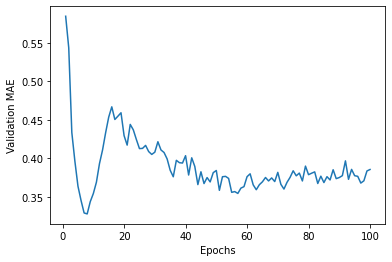

In [372]:
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [383]:
from keras import models
from keras import layers
model = models.Sequential()
def build_model(fun):
    model.add(layers.Dense(10, activation=fun, input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(8, activation=fun))
    model.add(layers.Dense(6, activation=fun))

    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model
model = build_model('relu')
history = model.fit(partial_x_train, partial_y_train,
                    validation_data=(partial_x_valid, partial_y_valid),
                    epochs=11, batch_size=1, verbose=0)
mae_history = history.history['val_mae']    

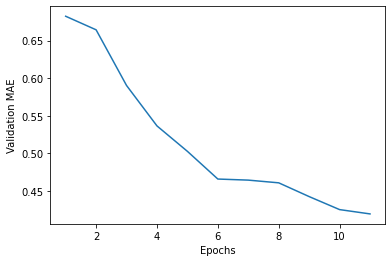

In [384]:
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [385]:
test_mse, test_mae = model.evaluate(X_test, y_test, verbose=0)

In [386]:
test_mse, test_mae

(0.10842323303222656, 0.2530890703201294)

In [387]:
model.predict(X_test)

array([[-0.44505754],
       [-0.7726844 ],
       [-0.5304641 ],
       [-0.4492111 ],
       [-0.14147243],
       [-0.5554888 ],
       [ 0.08652651],
       [-1.0655339 ],
       [-1.0483924 ],
       [-1.0199505 ],
       [-0.368487  ],
       [-0.5387841 ],
       [-0.47511297],
       [-0.81353396],
       [-0.8609259 ],
       [-0.26594213],
       [-0.29534966],
       [-0.8127143 ],
       [-0.85510904],
       [-0.8118024 ],
       [-0.70315343],
       [-0.7090848 ],
       [-0.05878193],
       [-0.07190237],
       [ 0.44641745],
       [ 0.44569993],
       [-0.06192019],
       [ 0.467326  ],
       [-0.02300257],
       [ 0.48777235],
       [-0.29080638],
       [-0.33565995],
       [-0.369208  ],
       [-0.29409495],
       [-0.37019664],
       [ 0.41818565],
       [ 0.41104466],
       [ 0.38304007],
       [ 0.14993978],
       [-0.31042865],
       [-0.43929192],
       [-0.26235828],
       [-0.4270452 ],
       [-0.41350934],
       [-0.1985228 ],
       [-0